# The Winton Stock Market Challenge Project

The competition provides the dataset consist of 40000 observations of five-day window's stock information. The Winton challenges us to predict returns of stock intraday(60 minutes), D+1 and D+2 using the previous stock data(D-2, D-1, and the first 120 minutes of intraday) and 25 mysterious features.  

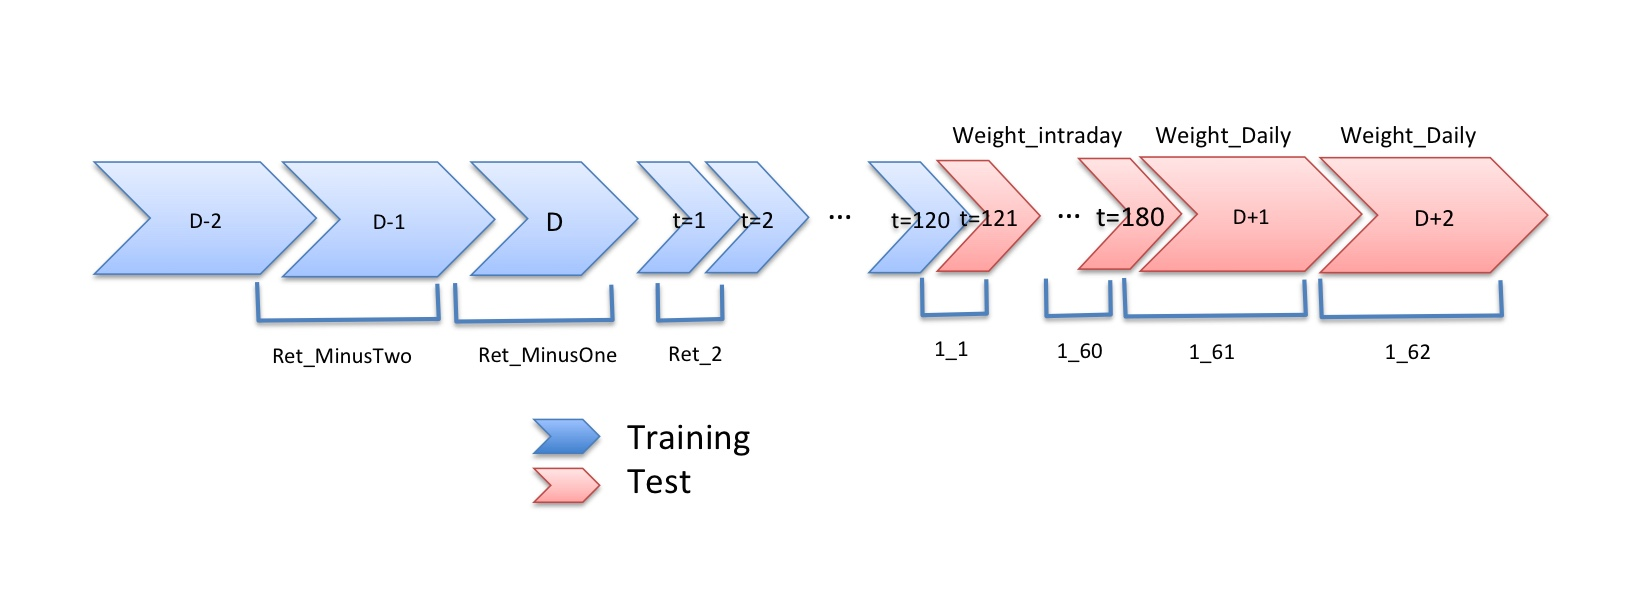

# Explore the Dataset

Firstly, I try to explore the dataset to see how to make use of them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
# explore all column names
train.columns.values

array(['Id', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
       'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21',
       'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
       'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4', 'Ret_5',
       'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9', 'Ret_10', 'Ret_11', 'Ret_12',
       'Ret_13', 'Ret_14', 'Ret_15', 'Ret_16', 'Ret_17', 'Ret_18',
       'Ret_19', 'Ret_20', 'Ret_21', 'Ret_22', 'Ret_23', 'Ret_24',
       'Ret_25', 'Ret_26', 'Ret_27', 'Ret_28', 'Ret_29', 'Ret_30',
       'Ret_31', 'Ret_32', 'Ret_33', 'Ret_34', 'Ret_35', 'Ret_36',
       'Ret_37', 'Ret_38', 'Ret_39', 'Ret_40', 'Ret_41', 'Ret_42',
       'Ret_43', 'Ret_44', 'Ret_45', 'Ret_46', 'Ret_47', 'Ret_48',
       'Ret_49', 'Ret_50', 'Ret_51', 'Ret_52', 'Ret_53', 'Ret

In [4]:
train.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


We can see that there are some features and minute returns(Ret_2-Ret_180) contain missing values. In order to preserve the number of observations, I fill the missing minute returns with an average of 2 minutes before and after the missing one.

In [5]:
# explore the observations
pd.set_option('max_info_columns',300)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 211 columns):
Id                 40000 non-null int64
Feature_1          6687 non-null float64
Feature_2          30854 non-null float64
Feature_3          38763 non-null float64
Feature_4          32279 non-null float64
Feature_5          40000 non-null float64
Feature_6          38067 non-null float64
Feature_7          40000 non-null int64
Feature_8          39531 non-null float64
Feature_9          38125 non-null float64
Feature_10         20529 non-null float64
Feature_11         39013 non-null float64
Feature_12         38904 non-null float64
Feature_13         39406 non-null float64
Feature_14         39272 non-null float64
Feature_15         37859 non-null float64
Feature_16         39390 non-null float64
Feature_17         39354 non-null float64
Feature_18         39432 non-null float64
Feature_19         38810 non-null float64
Feature_20         32174 non-null float64
Feature_21   

In [6]:
# fill the missing values
for i in range(23,205):
    train.iloc[:,i] = train.fillna(train.iloc[:,i-2:i+2].mean(), inplace=True)

In [7]:
# check the filled values
pd.set_option('max_info_columns',300)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 211 columns):
Id                 40000 non-null int64
Feature_1          6687 non-null float64
Feature_2          30854 non-null float64
Feature_3          38763 non-null float64
Feature_4          32279 non-null float64
Feature_5          40000 non-null float64
Feature_6          38067 non-null float64
Feature_7          40000 non-null int64
Feature_8          39531 non-null float64
Feature_9          38125 non-null float64
Feature_10         20529 non-null float64
Feature_11         39013 non-null float64
Feature_12         38904 non-null float64
Feature_13         39406 non-null float64
Feature_14         39272 non-null float64
Feature_15         37859 non-null float64
Feature_16         39390 non-null float64
Feature_17         39354 non-null float64
Feature_18         39432 non-null float64
Feature_19         38810 non-null float64
Feature_20         32174 non-null float64
Feature_21   

Split dataset to analyze all features.

In [8]:
# create dataset of features and return d+1, d+2
features = train[['Ret_PlusOne','Ret_PlusTwo','Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
       'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
       'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21',
       'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25']]

In [9]:
# take a look at the summary statisic of features
pd.set_option('display.max_columns', 30)
features.describe(include='all')

,Ret_PlusOne,Ret_PlusTwo,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
count,40000.000000,40000.000000,6687.000000,30854.000000,38763.000000,32279.000000,40000.000000,38067.000000,40000.000000,39531.000000,38125.000000,20529.000000,39013.000000,38904.000000,39406.000000,39272.000000,37859.000000,39390.000000,39354.000000,39432.000000,38810.000000,32174.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-0.000210,0.000012,3.590250,-0.117558,0.558392,0.405572,5.482775,0.430972,49244.971525,0.196958,10.680289,4.744703,-0.572244,0.498508,4.238162,1.588524,3.891381,1.007362,-0.549725,0.803059,-1.205438,5.267359,0.605593,-0.773089,0.799833,-1.209290,-0.329675
std,0.025039,0.024160,2.798532,1.236250,0.902233,0.799082,2.942324,1.498274,28242.409717,0.138485,2.850634,0.865096,1.246347,0.351855,2.570493,0.316907,5.035073,0.085488,0.936833,1.165442,0.642426,2.549227,1.302263,1.365673,1.260190,1.723796,0.950779
min,-0.627690,-0.450779,1.000000,-3.440521,-4.643526,-5.440596,1.000000,-0.936644,338.000000,0.009800,0.000000,1.000000,-7.359120,0.000000,0.000000,-0.149272,0.021679,1.000000,-2.613987,-5.758047,-3.292909,2.000000,-1.514998,-5.819912,-7.221387,-11.442205,-1.903876
25%,-0.010521,-0.010055,1.000000,-0.967186,-0.110192,-0.111696,2.000000,-0.265555,26143.000000,0.016600,9.000000,5.000000,-1.115527,0.140000,2.000000,1.415236,0.340081,1.000000,-1.021216,0.057598,-1.619718,3.000000,-0.279584,-1.746167,0.561513,-1.818760,-0.825369
50%,-0.000258,-0.000258,3.000000,-0.389162,0.437228,0.403516,6.000000,0.055564,48457.000000,0.213800,11.000000,5.000000,-0.324923,0.500000,4.000000,1.611754,1.292008,1.000000,-0.599050,0.587005,-1.169327,5.000000,0.342285,-0.769975,0.926006,-0.898416,-0.543432
75%,0.010005,0.009772,6.000000,0.414442,1.064754,0.945944,8.000000,0.559921,72387.000000,0.331800,12.000000,5.000000,0.323631,0.850000,6.000000,1.782934,6.357561,1.000000,-0.184854,1.321231,-0.735786,7.000000,1.086607,0.248467,1.392333,-0.144184,-0.264002
max,0.795602,0.303038,10.000000,4.175150,4.530405,2.953163,10.000000,12.609885,99861.000000,0.365000,36.000000,6.000000,1.786886,1.000000,9.000000,3.161848,28.018114,2.000000,7.683857,6.352352,0.898236,10.000000,7.737020,2.284991,3.228906,2.526654,4.020332


I just notice that there is a puzzle in the given 25 features. Take a look at the discussion in kaggle, the Winton told us that Feature_7 is date index and the rest contains some useful information. Thus, I try to sort my dataset by date to gain some insights.

In [10]:
features.head(20)

,Ret_PlusOne,Ret_PlusTwo,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,-0.019512,0.028846,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675
1,-0.002939,-0.010253,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462
2,-0.024791,0.015711,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370
3,-0.005680,-0.002190,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,-2.138383,0.00,6.0,NaN,1.801865,1.0,-1.131213,1.565036,NaN,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675
4,0.036104,-0.026552,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.0,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820
5,0.031098,-0.006551,NaN,NaN,-0.680515,NaN,1.0,0.227034,24099,0.2064,8.0,NaN,0.668207,0.65,1.0,1.607182,1.059815,1.0,-0.587538,0.230375,-0.897600,10.0,0.111960,1.670980,0.364626,1.039643,-0.404685
6,-0.011105,-0.030745,NaN,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,NaN,0.614787,0.85,7.0,1.829130,0.525992,1.0,-0.140953,0.016076,-0.966690,3.0,-0.186534,1.080087,0.799836,-0.753148,-0.440274
7,0.020268,-0.059093,NaN,2.582955,0.157344,0.617261,8.0,-0.177333,92214,0.2119,8.0,5.0,0.302677,0.48,3.0,1.489166,0.262896,1.0,-0.788162,0.951173,-1.896213,NaN,0.264332,0.014091,1.071300,-2.083937,-0.706392
8,-0.009348,-0.024755,NaN,-0.187950,-0.259820,0.047637,8.0,-0.381621,18418,0.3583,8.0,5.0,0.580929,0.83,1.0,1.709231,0.278276,1.0,-0.203904,NaN,-0.807255,NaN,-0.386895,0.376418,0.318258,0.036014,-0.213287
9,0.022407,-0.010674,NaN,2.883570,0.813783,0.796746,7.0,0.021982,47637,0.2654,6.0,5.0,-0.482580,0.88,1.0,1.241724,10.660042,1.0,-0.296651,0.310053,-0.673504,8.0,0.015727,-2.443845,1.088876,-0.799818,-0.847132


In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
Ret_PlusOne    40000 non-null float64
Ret_PlusTwo    40000 non-null float64
Feature_1      6687 non-null float64
Feature_2      30854 non-null float64
Feature_3      38763 non-null float64
Feature_4      32279 non-null float64
Feature_5      40000 non-null float64
Feature_6      38067 non-null float64
Feature_7      40000 non-null int64
Feature_8      39531 non-null float64
Feature_9      38125 non-null float64
Feature_10     20529 non-null float64
Feature_11     39013 non-null float64
Feature_12     38904 non-null float64
Feature_13     39406 non-null float64
Feature_14     39272 non-null float64
Feature_15     37859 non-null float64
Feature_16     39390 non-null float64
Feature_17     39354 non-null float64
Feature_18     39432 non-null float64
Feature_19     38810 non-null float64
Feature_20     32174 non-null float64
Feature_21     40000 non-null float64
Feature_22     40000

In [12]:
# sort the dataset by date
train = train.sort_values('Feature_7')

I plot the heat-map of the correlation between features, return d+1(Ret_PlusOne) and return d+2(Ret_PlusTwo). The map indicates that there's no relationship between returns and features. However, I think that the high-negative relationship(dark blue cell) could indicate some descriptive stats of stocks (something likes Max,Min,sd). Thus, I decide to keep features with full-observation (no missing value) for the forecasting.

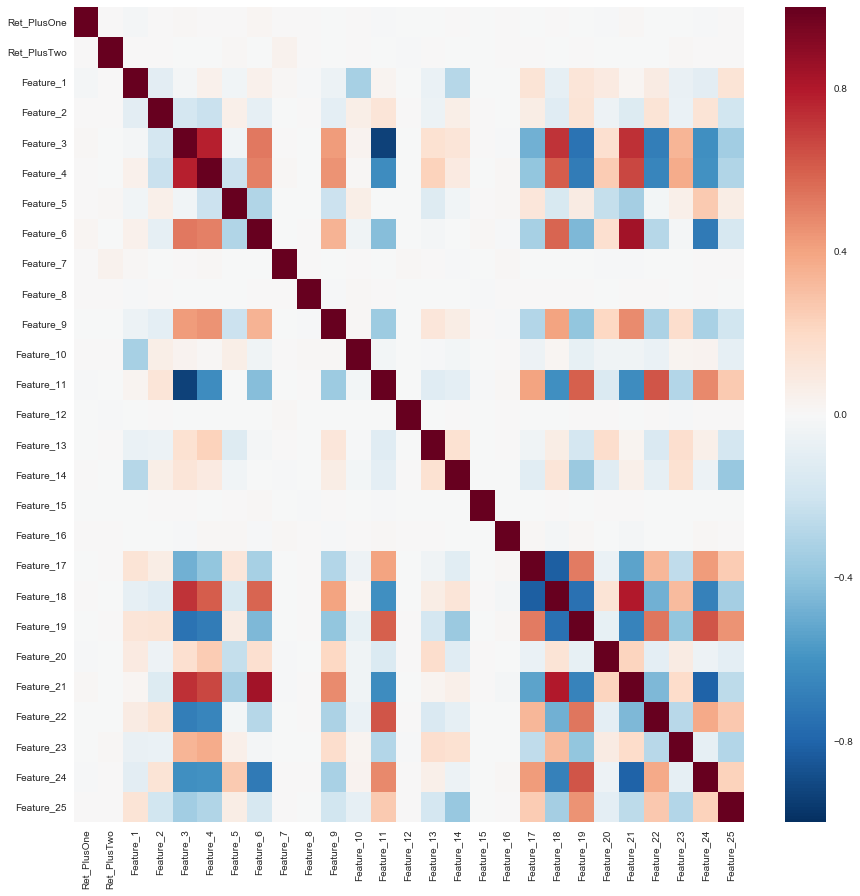

In [13]:
# plot heat-map
f = features.corr()
plt.figure(figsize=(15,15))
sns.heatmap(f)
plt.show()

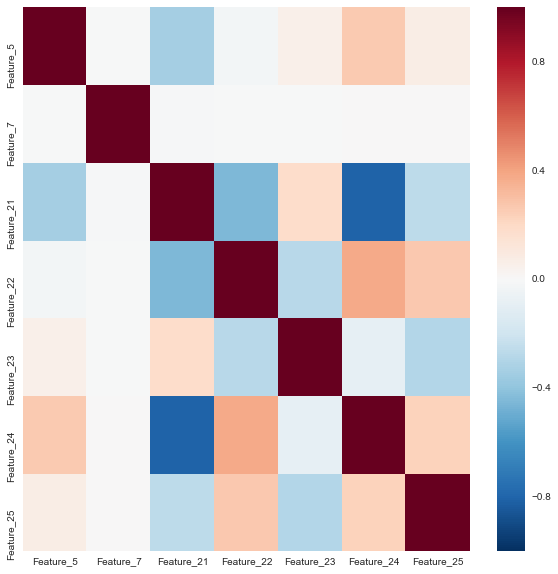

In [14]:
# heat-map after drop some features
f_drop = features.dropna(axis = 1)
del f_drop['Ret_PlusOne']
del f_drop['Ret_PlusTwo']
f = f_drop.corr()
plt.clf()
plt.figure(figsize=(10,10))
sns.heatmap(f)
plt.show()

In [15]:
f_drop.head()

,Feature_5,Feature_7,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,8.0,75751,0.605593,-0.489492,0.799833,-1.209290,-0.329675
1,3.0,17369,0.886205,-0.151805,1.239856,0.953424,-0.709462
2,9.0,8277,0.605593,0.389061,1.728096,-1.798090,-1.019370
3,5.0,22508,1.148738,-2.440799,1.551425,-1.788725,-0.329675
4,7.0,22423,3.381040,1.732708,1.965189,-5.993092,3.219820


After checking the relationship between features and daily returns, I also check for the correlation between minute-returns and features but there's no relationship so I construct the dataset for forcasting without features.

In [16]:
# checking for relationship between minute-returns and features
for i in range(28,207):
    for j in range(0,24):
       if  abs(train.iloc[:,[i,j]].corr().iloc[0,1]) >= 0.5:
        print(train.iloc[:,i].name + ' is correlated with ' + train.iloc[:,j].name)

In [17]:
# construct the variable for forcasting
day1 = train[['Ret_MinusTwo', 'Ret_MinusOne','Ret_PlusOne']]
day2 = train[['Ret_MinusTwo', 'Ret_MinusOne','Ret_PlusTwo']]
minute = train.loc[:,'Ret_2':'Ret_180']
w_intra = train.loc[:,'Weight_Intraday']
w_daily = train.loc[:,'Weight_Daily']
x_minute = minute.loc[:,'Ret_2':'Ret_120']
y_minute = minute.loc[:,'Ret_121':'Ret_180']
x_day1 = day1[['Ret_MinusTwo', 'Ret_MinusOne']]
y_day1 = day1[['Ret_PlusOne']]
x_day2 = day2[['Ret_MinusTwo', 'Ret_MinusOne']]
y_day2 = day2[['Ret_PlusTwo']]

I plot some part of the correlation between stocks in dataset after sort them by date and find this interesting results as stocks tend to correlate with each other on the same date. It could be useful to use stock data within the same date to train the model but I do not have enough time to include this in my forcasting.

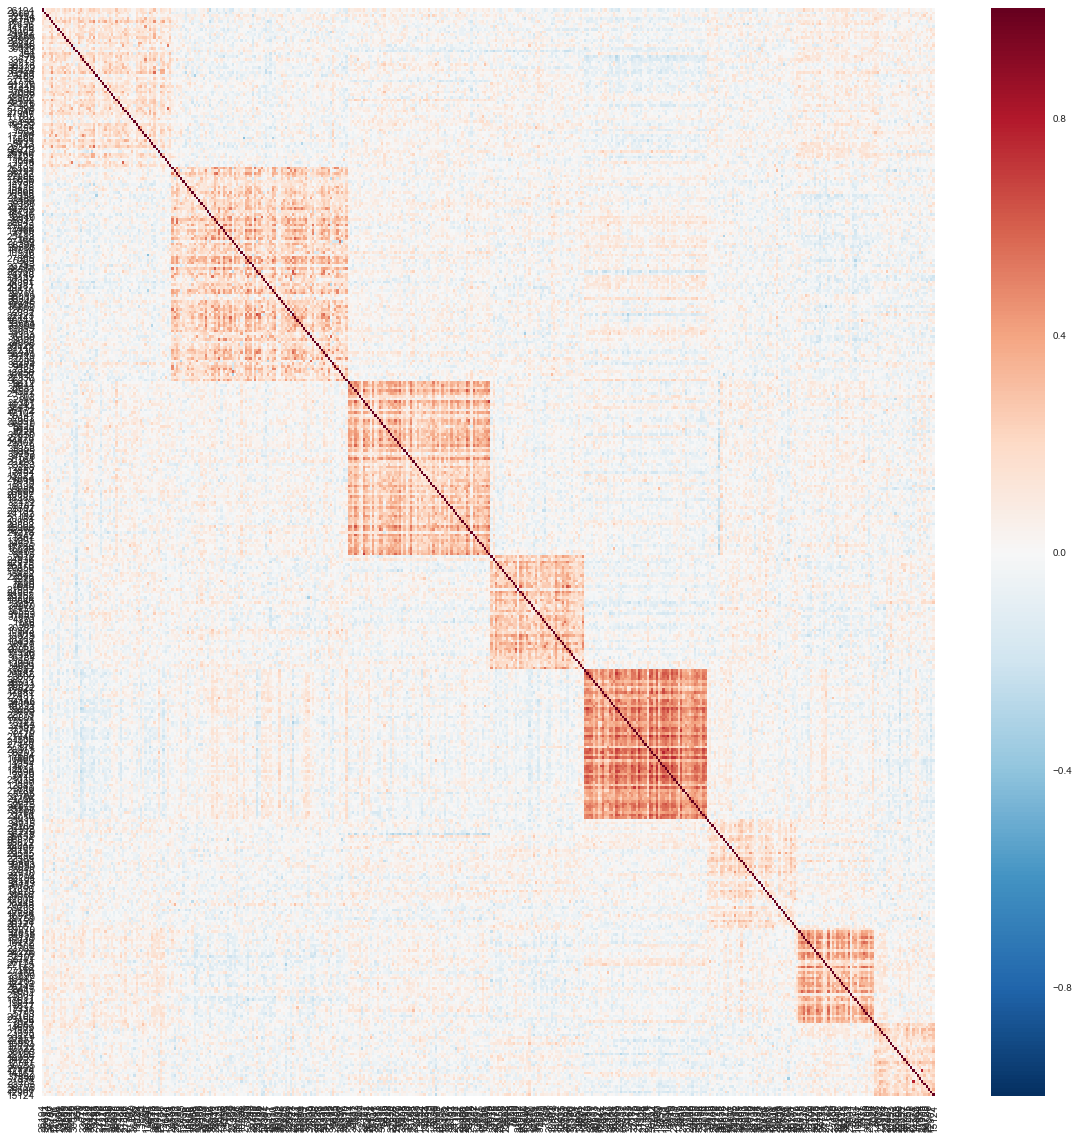

In [18]:
# correlation between stocks
m = minute.iloc[0:400,:].transpose()
m = m.corr()
plt.clf()
plt.figure(figsize=(20,20))
sns.heatmap(m)
plt.show()

# Forecasting Stock Return for the rest of day D (Ret_121 - Ret_180)

In this part, I use KNN, Linear Regression, Ridge, Decision Tree and Random Forest regressors in forecasting and evaluate model by the Weighted Mean Absolute Error (WMAE) using in the real competition and Cross-Validation method.

In [19]:
# Create KNN regressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
neigh.fit(x_minute,y_minute)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
          weights='uniform')

In [20]:
# Create Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True,n_jobs=-1)
lr.fit(x_minute,y_minute)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [21]:
# Create Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_minute, y_minute)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
# Create Decision-Tree Regressor
from sklearn import tree
dt = tree.DecisionTreeRegressor(max_depth=5)
dt.fit(x_minute, y_minute)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

The Random-Forest regressor does not support the multiple output calculation so we need to use the MultiOutputRegressor to create the seperated model for every minutes

In [23]:
# Create Random-Forest Regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
max_depth = 5
regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=max_depth,
                                                          random_state=0), n_jobs=-1)

In [24]:
regr_multirf.fit(x_minute, y_minute)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
           n_jobs=-1)

Create evaluation function using in the competition and Cross-validation function.

In [25]:
from sklearn.model_selection import KFold

# Winton Loss Function
def winton_loss_func(y, y_pred,w):
    y.columns = [i for i in range(y.shape[1])]
    error = y.subtract(y_pred).abs()
    row_sum = error.sum(axis = 1)
    w_row = w*row_sum
    w_mae = sum(w_row)/len(y.index)
    return w_mae

# Weighted Mean Absolute Error (WMAE) Function
def wmae(x,y,w,model):
    predict = model.predict(x)
    return winton_loss_func(y, predict, w)

# Cross-validation function evaluate by average WMAE
def validate_wmae(x,y,w,k_fold,model):
    k_fold = KFold(n_splits= k_fold)
    a = []
    for train, test in k_fold.split(x,y,w):
        m = model.fit(x.iloc[train,:],y.iloc[train,:])
        predict = m.predict(x.iloc[test,:])
        a.append(winton_loss_func(y.iloc[test,:], predict, w.iloc[test]))
    return sum(a) / float(len(a))


WMAE score using all observations.

In [27]:
for i in [neigh, lr, ridge, dt, regr_multirf]:
    print(wmae(x_minute,y_minute,w_intra,i))

40258.6523009
56016.7477585
54425.5949921
54098.481419
53620.2593512


WMAE score from Cross-Validation.

After validations, we can see that the KNN model(neigh) has an overfitted problem and Ridge Regression(ridge) yields the best results 

In [28]:
for i in [neigh, lr, ridge, dt, regr_multirf]:
    print(validate_wmae(x_minute,y_minute,w_intra,3,i))

56474.7420703
58812.5449296
54614.3433128
54821.3329605
54879.5161296


Since Ridge Regressor has the best performance, we try to develop them more with parameter optimization.

In [29]:
from sklearn.grid_search import GridSearchCV
params = {"alpha": np.arange(1,10), "normalize" : (True,False)}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, params,n_jobs=-1)

In [30]:
ridge_grid.fit(x_minute,y_minute)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'normalize': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

After the optimization, the model yields a bit better result.

In [31]:
print(validate_wmae(x_minute,y_minute,w_intra,3,ridge))
print(validate_wmae(x_minute,y_minute,w_intra,3,ridge_grid))

54614.3433128
54580.6354561


Add some features to input and create the model again.

In [32]:
x_minute_f = pd.concat([x_minute, f_drop],axis=1)
x_minute_f.head()

,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,...,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Feature_5,Feature_7,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,4.886832e-07,-0.000156,0.000029,-0.000005,-0.000430,...,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,8.0,75751,0.605593,-0.489492,0.799833,-1.209290,-0.329675
1,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-9.027256e-06,-0.000248,0.000487,0.000256,-0.000508,...,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04,3.0,17369,0.886205,-0.151805,1.239856,0.953424,-0.709462
2,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-9.295448e-04,-0.000543,0.000663,0.000787,0.000390,...,-0.000266,0.000786,0.001702,-0.000271,-0.000530,-0.000666,-0.000270,-3.718829e-04,9.0,8277,0.605593,0.389061,1.728096,-1.798090,-1.019370
3,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,0.000340,-0.000639,0.000420,1.449000e-04,-0.000130,0.000589,0.000410,0.000134,...,0.000006,0.000148,-0.000260,0.000387,-0.000435,-0.000689,0.000153,2.220483e-04,5.0,22508,1.148738,-2.440799,1.551425,-1.788725,-0.329675
4,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,0.001226,0.001213,-2.428211e-03,0.000974,0.000249,-0.001217,0.001220,...,0.000011,-0.000005,-0.000011,0.000003,-0.001229,-0.000003,0.001208,-4.473375e-07,7.0,22423,3.381040,1.732708,1.965189,-5.993092,3.219820


In [33]:
print(validate_wmae(x_minute_f,y_minute,w_intra,3,ridge_grid))

54590.0422718


It turns out that Features cannot help improving the minute forecasting model.

# Forecasting Stock Return for day D+1 and day D+2

We need to edit the evaluation function so that it can be used for evaluating daily return model.

In [34]:
w_daily = pd.DataFrame(w_daily)
from sklearn.model_selection import KFold
def winton_loss_func(y, y_pred,w):
    y.columns = [i for i in range(y.shape[1])]
    w.columns = [i for i in range(w.shape[1])]
    y_pred= pd.DataFrame(y_pred)
    error = y-y_pred
    w_row = error.abs()*w
    w_mae = w_row.sum()/len(y.index)
    return float(w_mae)

def wmae(x,y,w,model):
    predict = model.predict(x)
    return winton_loss_func(y, predict, w)

def validate_wmae(x,y,w,k_fold,model):
    k_fold = KFold(n_splits= k_fold)
    a = []
    for train, test in k_fold.split(x,y,w):
        m = model.fit(x.iloc[train,:],y.iloc[train,:])
        predict = m.predict(x.iloc[test,:])
        a.append(winton_loss_func(y.iloc[test,:], predict, w.iloc[test]))
    return sum(a) / float(len(a))

In [35]:
# create KNN regressor
from sklearn.neighbors import KNeighborsRegressor
neigh_day1 = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
neigh_day2 = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
neigh_day1.fit(x_day1,y_day1)
neigh_day2.fit(x_day2,y_day2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
          weights='uniform')

In [36]:
# create Linear Regression
from sklearn.linear_model import LinearRegression
lr_day1 = LinearRegression(normalize=True,n_jobs=-1)
lr_day2 = LinearRegression(normalize=True,n_jobs=-1)
lr_day1.fit(x_day1,y_day1)
lr_day2.fit(x_day2,y_day2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [37]:
# create Ridge Regression
from sklearn.linear_model import Ridge
ridge_day1 = Ridge(alpha=1.0)
ridge_day2 = Ridge(alpha=1.0)
ridge_day1.fit(x_day1,y_day1)
ridge_day2.fit(x_day2,y_day2)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
# create Decision-Tree Regressor
from sklearn import tree
dt_day1 = tree.DecisionTreeRegressor(max_depth=5)
dt_day2 = tree.DecisionTreeRegressor(max_depth=5)
dt_day1.fit(x_day1,y_day1)
dt_day2.fit(x_day2,y_day2)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [39]:
# create Random-Forest Regressor
from sklearn.ensemble import RandomForestRegressor
max_depth = 5
regr_multirf_day1 = RandomForestRegressor(max_depth=max_depth,random_state=0)
regr_multirf_day2 = RandomForestRegressor(max_depth=max_depth,random_state=0)
regr_multirf_day1.fit(x_day1,y_day1)
regr_multirf_day2.fit(x_day2,y_day2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

I use the ensemble learning technique to combine multiple regression models via a meta-regressor using StackingRegressor from mlxtend package. The working processes are as follows:

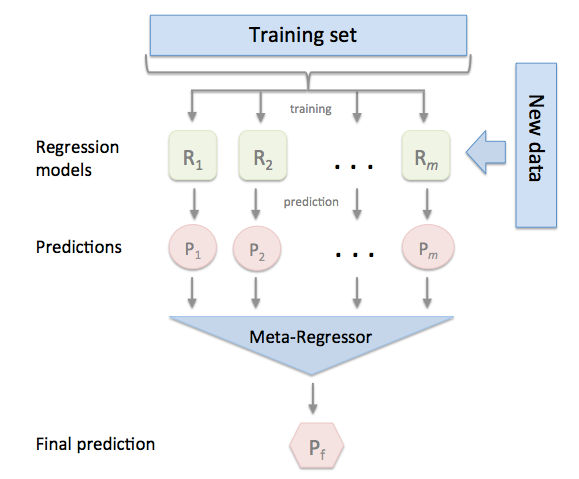
Source: mlxtend

In [40]:
# create a Stacking model of lr, ridge, dt, regr_multirf using Support Vector Regressor as Meta-Regressor
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR
svr_sig = SVR(kernel='sigmoid')
stregr_day1 =  StackingRegressor(regressors=[lr, ridge, dt, regr_multirf], 
                           meta_regressor=svr_sig)
stregr_day2 =  StackingRegressor(regressors=[lr, ridge, dt, regr_multirf], 
                           meta_regressor=svr_sig)
stregr_day1.fit(x_day1,y_day1)
stregr_day2.fit(x_day2,y_day2)

StackingRegressor(meta_regressor=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         regressors=[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001), DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
        ...=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
           n_jobs=-1)],
         verbose=0)

WMAE score for Day+1 models using all observations.

In [41]:
for i in [lr_day1, ridge_day1, neigh_day1, regr_multirf_day1, stregr_day1]:
    print(wmae(x_day1,y_day1,w_daily,i))

28272.177788839344
28271.755648550028
33130.86476275591
28415.359473297154
28396.854953718488


WMAE score for Day+1 models from Cross-Validation.

Ridge Regression(ridge) yields the best results both when using all observations and in the Validation. 

In [43]:
for i in [lr_day2,ridge_day2,neigh_day2,regr_multirf_day2,stregr_day2]:
    print(validate_wmae(x_day1,y_day1,w_daily,3,i))

9354.808858674443
9353.67374565984
11068.295961169759
9428.677821476325
9539.414951137578


WMAE score for Day+2 models using all observations.

In [44]:
for i in [lr_day2,ridge_day2,neigh_day2,regr_multirf_day2,stregr_day2]:
    print(wmae(x_day2,y_day2,w_daily,i))

27474.246291846954
27469.05720096674
32556.705139909052
27783.47412674747
28583.141793698578


WMAE score for Day+2 models from Cross-Validation.

In [46]:
for i in [lr_day2, ridge_day2, neigh_day2, regr_multirf_day2, stregr_day2]:
    print(validate_wmae(x_day2,y_day2,w_daily,3,i))

9165.165722592392
9163.262166721166
10707.357008728253
9194.500399474959
9967.619904859568


Since Ridge Regressor has the best performance in both D+1 and D+2 evaluations, we try to develop them more with parameter optimization.

In [47]:
from sklearn.grid_search import GridSearchCV
params = {"alpha": np.arange(1,10), "normalize" : (True,False)}
ridge = Ridge()
ridge_grid_day1 = GridSearchCV(ridge, params,n_jobs=-1)
ridge_grid_day2 = GridSearchCV(ridge, params,n_jobs=-1)
ridge_grid_day1.fit(x_day1,y_day1)
ridge_grid_day2.fit(x_day2,y_day2)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'normalize': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

After the optimization, the model yields a bit better result both for D+1 and D+2.

In [48]:
print(validate_wmae(x_day1,y_day1,w_daily,3,ridge_day1))
print(validate_wmae(x_day1,y_day1,w_daily,3,ridge_grid_day1))

9353.67374565984
9339.81378658268


In [49]:
print(validate_wmae(x_day2,y_day2,w_daily,3,ridge_day2))
print(validate_wmae(x_day2,y_day2,w_daily,3,ridge_grid_day2))

9163.262166721166
9143.958314913421


Add some features to input and create the model again.

In [50]:
x_day1_f = pd.concat([x_day1, f_drop],axis=1)
x_day2_f = pd.concat([x_day2, f_drop],axis=1)

In [51]:
print(validate_wmae(x_day1_f,y_day1,w_daily,3,ridge_grid_day1))
print(validate_wmae(x_day2_f,y_day2,w_daily,3,ridge_grid_day2))

9341.396096005416
9145.440442730405


Features also cannot help improving the daily_return forecasting model.

# Conclusion

It is difficult to predict the intraday stock return since the intraday return is truly random walk (in the picture below). That is the reason why the linear models always beat other models, and the ridge regression slightly beats the linear regression since the ridge regression penalize in such a way that less influential features undergo more penalization. One way to improve the results is to take advantage of the date feature and use a group of highly correlated stock to train each other and construct the better parameter optimization to trained model.

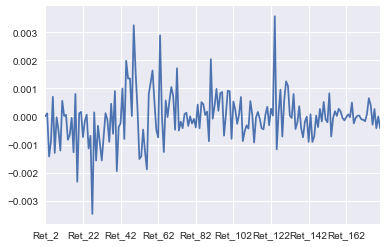

In [53]:
minute.iloc[1,:].plot()
plt.show()